In [1]:
import os
import sys
import argparse
import json
import pickle
import re
from tqdm import tqdm
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from collections import Counter

In [4]:
from nmt_run import *

In [5]:
callhome_beam = pickle.load(open("./experiments/nmt_asr/callhome_fisher-160_ep75/callhome_devtest_attn_N-5_K-5.dict", "rb"))

In [6]:
callhome_utts = list(callhome_beam.keys())

In [8]:
len(callhome_utts)

3799

In [11]:
sorted(callhome_utts)

['sp_0897-A-1',
 'sp_0897-A-10',
 'sp_0897-A-11',
 'sp_0897-A-12',
 'sp_0897-A-13',
 'sp_0897-A-14',
 'sp_0897-A-15',
 'sp_0897-A-16',
 'sp_0897-A-17',
 'sp_0897-A-18',
 'sp_0897-A-19',
 'sp_0897-A-2',
 'sp_0897-A-20',
 'sp_0897-A-21',
 'sp_0897-A-22',
 'sp_0897-A-23',
 'sp_0897-A-24',
 'sp_0897-A-25',
 'sp_0897-A-26',
 'sp_0897-A-27',
 'sp_0897-A-28',
 'sp_0897-A-29',
 'sp_0897-A-3',
 'sp_0897-A-30',
 'sp_0897-A-31',
 'sp_0897-A-32',
 'sp_0897-A-33',
 'sp_0897-A-34',
 'sp_0897-A-35',
 'sp_0897-A-36',
 'sp_0897-A-37',
 'sp_0897-A-38',
 'sp_0897-A-39',
 'sp_0897-A-4',
 'sp_0897-A-40',
 'sp_0897-A-41',
 'sp_0897-A-42',
 'sp_0897-A-43',
 'sp_0897-A-44',
 'sp_0897-A-45',
 'sp_0897-A-46',
 'sp_0897-A-47',
 'sp_0897-A-48',
 'sp_0897-A-49',
 'sp_0897-A-5',
 'sp_0897-A-50',
 'sp_0897-A-51',
 'sp_0897-A-52',
 'sp_0897-A-53',
 'sp_0897-A-54',
 'sp_0897-A-55',
 'sp_0897-A-56',
 'sp_0897-A-57',
 'sp_0897-A-58',
 'sp_0897-A-59',
 'sp_0897-A-6',
 'sp_0897-A-60',
 'sp_0897-A-61',
 'sp_0897-A-62',
 's

In [13]:
callhome_map = pickle.load(open("./mfcc_13dim/callhome_map.dict", "rb"))

In [17]:
callhome_map_utts = list(callhome_map["callhome_devtest"].keys())

In [18]:
len(callhome_map_utts)

3966

In [19]:
bucket_dict = pickle.load(open("./experiments/nmt_asr/callhome_fisher-160_ep75/buckets_sp.dict", "rb"))

In [23]:
callhome_info = pickle.load(open("./mfcc_13dim/callhome_info.dict", "rb"))

In [24]:
len(callhome_info["callhome_devtest"])

3799

In [22]:
sum([len(b) for b in bucket_dict["callhome_devtest"]["buckets"]])

3799

In [29]:
callhome_map['callhome_devtest']['sp_0897-B-102']

{'bpe_w': [b'yes',
  b'pan@@',
  b'ch@@',
  b'o',
  b'is',
  b'happ@@',
  b'y',
  b'too',
  b'he',
  b'wanted',
  b'to',
  b'have',
  b'them',
  b'here'],
 'en_c': [b'y',
  b'e',
  b's',
  b' ',
  b'p',
  b'a',
  b'n',
  b'c',
  b'h',
  b'o',
  b' ',
  b'i',
  b's',
  b' ',
  b'h',
  b'a',
  b'p',
  b'p',
  b'y',
  b' ',
  b't',
  b'o',
  b'o',
  b' ',
  b'h',
  b'e',
  b' ',
  b'w',
  b'a',
  b'n',
  b't',
  b'e',
  b'd',
  b' ',
  b't',
  b'o',
  b' ',
  b'h',
  b'a',
  b'v',
  b'e',
  b' ',
  b't',
  b'h',
  b'e',
  b'm',
  b' ',
  b'h',
  b'e',
  b'r',
  b'e'],
 'en_w': [b'yes',
  b'pancho',
  b'is',
  b'happy',
  b'too',
  b'he',
  b'wanted',
  b'to',
  b'have',
  b'them',
  b'here'],
 'es_c': [b'e',
  b's',
  b' ',
  b'e',
  b's',
  b' ',
  b'u',
  b'n',
  b'a',
  b' ',
  b'a',
  b'l',
  b'e',
  b'g',
  b'r',
  b'\xc3\xad',
  b'a',
  b' ',
  b'p',
  b'a',
  b'r',
  b'a',
  b' ',
  b'p',
  b'a',
  b'n',
  b'c',
  b'h',
  b'o',
  b' ',
  b't',
  b'a',
  b'm',
  b'b',
  b'i',
  b'\x

In [9]:
'sp_0897-B-101' in callhome_utts

False

In [5]:
haha = pickle.load(open("./mfcc_13dim/info_mboshi.dict", "rb"))

In [7]:
train_ids = set(haha["mboshi_train"].keys())
len(train_ids)

4416

In [8]:
test_ids = set(haha["mboshi_test"].keys())
len(test_ids)

514

In [33]:
len(callhome_map_utts), len(set(callhome_map_utts))

(3966, 3966)

In [40]:
ha = set(callhome_map_utts) - set(callhome_utts)

In [42]:
ha

{'sp_0897-B-101',
 'sp_0897-B-103',
 'sp_0897-B-105',
 'sp_0897-B-107',
 'sp_0897-B-109',
 'sp_0897-B-111',
 'sp_0897-B-113',
 'sp_0897-B-115',
 'sp_0897-B-117',
 'sp_0897-B-119',
 'sp_0897-B-121',
 'sp_0897-B-123',
 'sp_0897-B-125',
 'sp_0897-B-37',
 'sp_0897-B-69',
 'sp_0897-B-71',
 'sp_0897-B-73',
 'sp_0897-B-75',
 'sp_0897-B-77',
 'sp_0897-B-80',
 'sp_0897-B-82',
 'sp_0897-B-84',
 'sp_0897-B-86',
 'sp_0897-B-88',
 'sp_0897-B-90',
 'sp_0897-B-92',
 'sp_0897-B-95',
 'sp_0897-B-97',
 'sp_0897-B-99',
 'sp_0968-A-99',
 'sp_0981-A-100',
 'sp_0981-A-101',
 'sp_0981-A-102',
 'sp_0981-A-103',
 'sp_0981-A-104',
 'sp_0981-A-105',
 'sp_0981-A-106',
 'sp_0981-A-107',
 'sp_0981-A-108',
 'sp_0981-A-109',
 'sp_0981-A-110',
 'sp_0981-A-111',
 'sp_0981-A-112',
 'sp_0981-A-113',
 'sp_0981-A-79',
 'sp_0981-A-80',
 'sp_0981-A-81',
 'sp_0981-A-82',
 'sp_0981-A-83',
 'sp_0981-A-84',
 'sp_0981-A-85',
 'sp_0981-A-86',
 'sp_0981-A-87',
 'sp_0981-A-88',
 'sp_0981-A-89',
 'sp_0981-A-90',
 'sp_0981-A-91',
 'sp

In [43]:
len(ha)

167

In [44]:
he = set(callhome_utts) - set(callhome_map_utts)

In [45]:
he

set()

In [46]:
len(he)

0

In [9]:
train_ids & test_ids

set()

In [ ]:
hehe = pickle.load(open("./mfcc_13dim/fisher_dev_eval.ids"))

In [2]:
train_text = "../subword-nmt/fisher_train.en"
dev_text = "../subword-nmt/fisher_dev.en"

In [6]:
def get_words(text_fname):
    words = []
    with open(text_fname, "r", encoding="utf-8") as in_f:
        for line in in_f:
            words.extend(line.strip().split())
    return Counter(words)        

In [7]:
train_counter = get_words(train_text)
dev_counter = get_words(dev_text)

In [21]:
train_counter.most_common(10)

[('the', 55098),
 ('i', 52158),
 ('and', 45559),
 ('that', 37779),
 ('yes', 35097),
 ('you', 32744),
 ('to', 32581),
 ('a', 28467),
 ('in', 24714),
 ('is', 22477)]

In [13]:
def get_lengths(text_fname):
    lengths = []
    with open(text_fname, "r", encoding="utf-8") as in_f:
        for line in in_f:
            lengths.append(len(line.strip().split()))
    return np.array(lengths)

In [14]:
train_lengths = get_lengths(train_text)
dev_lengths = get_lengths(dev_text)

In [19]:
np.mean(train_lengths), np.min(train_lengths), np.max(train_lengths)

(10.389154222404715, 0, 67)

In [20]:
np.mean(dev_lengths), np.min(dev_lengths), np.max(dev_lengths)

(10.082181452626289, 1, 66)

In [81]:
K = 75
N = len(dev_lengths)
N = 3977

In [82]:
N

3977

In [83]:
def write_k_most_common(out_fname, K, N):
    k_words = " ".join([i[0] for i in train_counter.most_common(K)])
    out_line = "{0:s}\n".format(k_words)
    with open(out_fname, "w", encoding="utf-8") as out_f:
        for n in range(N):
            out_f.write(out_line)

In [84]:
write_k_most_common("./mfcc_13dim/fisher_dummy_top-{0:d}_words.en".format(K), K=K, N=N)

(array([6.6059e+04, 3.0865e+04, 1.7434e+04, 1.1676e+04, 9.2650e+03,
        2.8020e+03, 5.4500e+02, 1.3900e+02, 2.9000e+01, 5.0000e+00]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <a list of 10 Patch objects>)

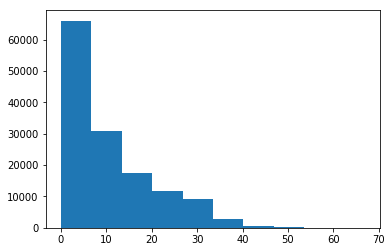

In [60]:
plt.hist(train_lengths)

In [ ]:
utt_hyps = pickle.load(open("./experiments/nmt_asr/sp-20hrs_swbd1-train100k/fisher_dev_attn_N-5_K-5.dict",
                                "rb"))

In [18]:
map_dict = pickle.load(open("./mfcc_13dim/bpe_map.dict", "rb"))

In [ ]:
filt_utts = []
for u in utt_hyps:
    if (len(map_dict["fisher_dev"][u]["es_w"]) >= 0 and
       len(map_dict["fisher_dev"][u]["es_w"]) <= 300):
        filt_utts.append(u)

filt_utts = sorted(filt_utts)

In [23]:
with open("./mfcc_13dim/fisher_dev_eval.ids", "w") as out_f:
    for u in filt_utts:
        out_f.write("{0:s}\n".format(u))

In [24]:
utt_test_hyps = pickle.load(open("./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_enc-attn-dec/fisher_test_attn_N-5_K-5.dict",
                                "rb"))

In [25]:
filt_utts = []
for u in utt_test_hyps:
    if (len(map_dict["fisher_test"][u]["es_w"]) >= 0 and
       len(map_dict["fisher_test"][u]["es_w"]) <= 300):
        filt_utts.append(u)

filt_utts = sorted(filt_utts)

In [26]:
with open("./fisher/fisher_test/fisher_test_eval.ids", "w") as out_f:
    for u in filt_utts:
        out_f.write("{0:s}\n".format(u))

In [20]:
filt_utts[0]

'20051028_180633_356_fsp-A-1'

In [22]:
utt_test_hyps[filt_utts[1]]

[]

In [ ]:
with open("./fisher/fisher_test/fisher_test_eval.ids", "w") as out_f:
    for u in filt_utts:
        out_f.write("{0:s}\n".format(u))

In [ ]:
speech_path = "/disk/scratch/s1444673/zero/installs/kaldi/egs/swbd/s5c/swbd1_train_100k/"

In [ ]:
haha = np.load("/disk/scratch/s1444673/zero/installs/kaldi/egs/swbd/s5c/swbd1_train_100k/sw02054.np")

In [ ]:
haha['sw02054-A_000204-000790'].shape

In [ ]:
map_speech_segments(map_dict[cat], cat_speech_path, cat_out_path, false)

In [ ]:
# %load_ext autoreload
# %autoreload 1

# %aimport basics
# %aimport enc_dec

from basics import *
from enc_dec import *
import prep_buckets
%matplotlib inline

In [ ]:
from nmt_run import *

In [ ]:
def copy_encoder_params(src_model, target_model):
    target_model.CNN_0 = src_model.CNN_0
    target_model.CNN_0_bn = src_model.CNN_0_bn
    
    target_model.CNN_1 = src_model.CNN_1
    target_model.CNN_1_bn = src_model.CNN_1_bn
    
    target_model.L0_enc = src_model.L0_enc
    target_model.L1_enc = src_model.L1_enc
    target_model.L2_enc = src_model.L2_enc
    
    target_model.L0_rev_enc = src_model.L0_rev_enc
    target_model.L1_rev_enc = src_model.L1_rev_enc
    target_model.L2_rev_enc = src_model.L2_rev_enc    

    return target_model

In [ ]:
def copy_attention_params(src_model, target_model):
    target_model.attn_Wa = src_model.attn_Wa
    target_model.context = src_model.context
    return target_model

In [ ]:
def copy_decoder_params(src_model, target_model):
    target_model.L0_dec = src_model.L0_dec
    target_model.L1_dec = src_model.L1_dec
    target_model.L2_dec = src_model.L2_dec
    target_model.embed_dec = src_model.embed_dec
    target_model.out = src_model.out
    return target_model

In [ ]:
m1_path = "./asr_en/sp_train_nodev_ep25"
m2_path = "./experiments/nmt_asr/sp-20hrs_swbd1-train-nodev_ep25_dec-only/"

In [ ]:
_, model1, _, _, _ = check_model(m1_path)

In [ ]:
model1.__dict__.keys()

In [ ]:
enc_components = ['CNN_0', 'CNN_0_bn', 'CNN_1', 'CNN_1_bn', 
                  'L0_enc', 'L1_enc', 'L2_enc', 
                  'L0_rev_enc', 'L1_rev_enc', 'L2_rev_enc']
attn_components = ['attn_Wa', 'context']
dec_components = ['L0_dec', 'L1_dec', 'L2_dec', 'embed_dec', 'out']

In [ ]:
_, model2, _, m_cfg, _ = check_model(m2_path)

In [ ]:
# model2 = copy_encoder_params(src_model=model1, target_model=model2)
# model2 = copy_attention_params(src_model=model1, target_model=model2)
model2 = copy_decoder_params(src_model=model1, target_model=model2)

In [ ]:
model_fil = m_cfg['model_fname']

In [ ]:
model_fil

In [ ]:
serializers.save_npz(model_fil.replace(".model", "_{0:d}.model".format(25)), model2)

In [ ]:
model1.embed_dec.W.shape

In [ ]:
def check_dec_components(m1, m2):
    print(xp.all(m1.L0_dec.lateral.W.data == m2.L0_dec.lateral.W.data))
    print(xp.all(m1.L0_dec.upward.W.data == m2.L0_dec.upward.W.data))
    print(xp.all(m1.L0_dec.upward.b.data == m2.L0_dec.upward.b.data))
    
    print(xp.all(m1.L1_dec.lateral.W.data == m2.L1_dec.lateral.W.data))
    print(xp.all(m1.L1_dec.upward.W.data == m2.L1_dec.upward.W.data))
    print(xp.all(m1.L1_dec.upward.b.data == m2.L1_dec.upward.b.data))
    
    print(xp.all(m1.L2_dec.lateral.W.data == m2.L2_dec.lateral.W.data))
    print(xp.all(m1.L2_dec.upward.W.data == m2.L2_dec.upward.W.data))
    print(xp.all(m1.L2_dec.upward.b.data == m2.L2_dec.upward.b.data))
    
    print(xp.all(m1.out.W.data == m2.out.W.data))
    print(xp.all(m1.embed_dec.W.data == m2.embed_dec.W.data))

In [ ]:
model2.embed_dec.W[5:,:], model1.embed_dec.W[5:,]

In [ ]:
check_dec_components(model1, model2)

In [ ]:
model2.

### old code

In [ ]:
model_cfg_path = "./es_w_cfg_1/model_cfg.json"
train_cfg_path = "./es_w_cfg_1/train_cfg.json"

In [ ]:
with open(model_cfg_path, "r") as model_f:
        model_cfg = json.load(model_f)

with open(train_cfg_path, "r") as train_f:
        train_cfg = json.load(train_f)

In [ ]:
max_epoch, model, optimizer = check_model(model_cfg, train_cfg)

In [ ]:
map_dict, vocab_dict, bucket_dict = get_data_dicts(model_cfg)

In [ ]:
os.chdir('..')
os.chdir('speech2text')

In [ ]:
model_cfg

In [ ]:
model.L0_dec.W.W.shape

### Get batch of data

In [ ]:
key = 'fisher_train'

In [ ]:
b_dict=bucket_dict[key]
m_dict = map_dict[key]
vocab_dict=vocab_dict
batch_size=25
x_key=model_cfg['enc_key']
y_key=model_cfg['dec_key']
train=False
cat_speech_path=os.path.join(model_cfg['data_path'], key)

num_b = b_dict['num_b']
width_b = b_dict['width_b']
# b = num_b-1
b = 9
bucket = b_dict['buckets'][b]
b_len = len(bucket)
input_path = os.path.join(model_cfg['data_path'], model_cfg['train_set'])
utt_list = bucket[0:0+batch_size]

In [ ]:
num_b, b_len, width_b, b

In [ ]:
utt_list = bucket[:batch_size]

In [ ]:
len(utt_list)

In [ ]:
batch_data = get_batch(m_dict, x_key, y_key, utt_list, vocab_dict, ((b+1) * width_b), 200, 
                           input_path=input_path)

In [ ]:
batch_data['X'].shape, batch_data['y'].shape

In [ ]:
y = batch_data['y']
y = F.swapaxes(y, 0, 1)
y.shape

In [ ]:
batch_size = y.shape[1]
loss = 0
# ---------------------------------------------------------------------
# initialize hidden states as a zero vector
# ---------------------------------------------------------------------
a_units = model.m_cfg['attn_units']
ht = Variable(xp.zeros((batch_size, a_units), dtype=xp.float32))
print(batch_size, ht.shape)
decoder_input = y[0]
print(decoder_input.shape)

In [ ]:
embed_id = F.dropout(model.embed_dec(decoder_input), ratio=model.m_cfg['rnn_dropout'])

In [ ]:
embed_id.shape

In [ ]:
rnn_in = F.concat((embed_id, ht), axis=1)
rnn_in.shape

In [ ]:
model.L0_dec.W.W.shape

In [ ]:
hs = rnn_in
hs = model[model.rnn_dec[0]](hs)

In [ ]:
print("bucket size={0:d}".format(b_len))

for i in range(0,batch_size, batch_size):
    utt_list = bucket[i:i+batch_size]
    batch_data = get_batch(m_dict, x_key, y_key, utt_list, vocab_dict, ((b+1) * width_b), 200, 
                           input_path=input_path)
    print(i, batch_data['X'].shape, batch_data['y'].shape)
    
    with chainer.using_config('train', True): 
        cuda.get_device(model.gpuid).use()
        p, loss = model.forward(X=batch_data['X'], y=batch_data['y'])
    
    model.cleargrads()
    
    loss.backward()
    # loss_1.backward()

    # model.addgrads(model_1)
    optimizer.update()
    
    print(loss)
    break

In [ ]:
batch_data

In [ ]:
p

In [ ]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
fsh_pred_sents, fsh_utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=False, mini=False)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

In [ ]:
fsh_pred_sents[4]

In [ ]:
model.L0_dec.W.W.shape, model.L0_enc.W.W.shape, model.L0_rev_enc.W.W.shape, model.embed_dec.W.shape

In [ ]:
256+256+256

In [ ]:
model.L2_dec.W.W[:5,:5]

In [ ]:
model.L2_dec.W.W.data[0,0] = 0.01

In [ ]:
model.add_weight_noise(0.,0.125)

In [ ]:
model.L2_dec.W.W[:5,:5]

In [ ]:
model.L2_dec.W.update_enabled

In [ ]:
optimizer.setup(model)

In [ ]:
model.L2_dec.W

In [ ]:
model.L2_dec.W

In [ ]:
20000 * 64 / 138708

In [ ]:
xp.random.normal(0, .125, (5,5), dtype=xp.float32)

In [ ]:
model.rnn_enc

In [ ]:
model.L0_dec.W, model.L0_dec.W_r, model.L0_dec.W_z

In [ ]:
model.L0_dec.U, model.L0_dec.U_r, model.L0_dec.U_z

In [ ]:
model.L0_dec.U.W.shape, model.L0_dec.U.b.shape, model.L0_dec.U_r.W.shape, model.L0_dec.U_r.b.shape

In [ ]:
model.embed_dec.W.shape

In [ ]:
mu, sigma = 0, 0.125 # mean and standard deviation

for rnn_layer in model.rnn_enc + model.rnn_dec:
    print(rnn_layer)
    layer_shape = model[rnn_layer]["W"].W.shape
    print(layer_shape)
    

In [ ]:
reduce_dim = CNN_IN_DIM
cnn_out_dim = 0
for i, l in enumerate(cnn_filters):
    cnn_out_dim += l["out_channels"]
    print(reduce_dim, l["stride"][1])
    reduce_dim = math.ceil(reduce_dim / l["stride"][1])
    print(reduce_dim)
    print(l["out_channels"])


In [ ]:
cnn_out_dim

In [ ]:
CNN_IN_DIM

In [ ]:
cnn_filters[-1]["out_channels"]

In [ ]:
x = batch_data['X']

In [ ]:
x.shape

In [ ]:
F.expand_dims(x,2).shape

In [ ]:
model.cleargrads()

In [ ]:
loss.backward()

In [ ]:
if lstm1_or_gru0:
    print(model.L1_dec.lateral.W.grad)
else:
    print(model.L1_dec.W.W.grad)

In [ ]:
model.attn_Wa.W.grad

In [ ]:
model.out.W.grad

In [ ]:
if lstm1_or_gru0:
    print(model.L0_enc.lateral.W.grad)
else:
    print(model.L0_enc.W.W.grad)

In [ ]:
def plot_model_weights_grads(layer):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
    plt.axis('off')
    weights = layer.data
    grads = layer.grad
    if gpuid >= 0:
        weights = cuda.cupy.asnumpy(weights[:,:])
        grads = cuda.cupy.asnumpy(grads[:,:])
    # plt.imshow(weights, interpolation='none')
    ax1 = sns.heatmap(weights, cmap="RdBu_r", ax=ax1, xticklabels=False, yticklabels=False)
    ax2 = sns.heatmap(grads, cmap="RdBu_r", ax=ax2, xticklabels=False, yticklabels=False)
    print(weights.shape)

In [ ]:
plot_model_weights_grads(model.L0_enc.W.W)

In [ ]:
plot_model_weights_grads(model.L1_dec.W.W)

In [ ]:
plot_model_weights_grads(model.out.W)

In [ ]:
xp.min(model.CNN_0.W.data)

In [ ]:
xp.nonzero(model.embed_dec.W.grad)

In [ ]:
x_key, y_key

In [ ]:
es_c_utt_lens = []
en_c_utt_lens = []
total_num = 0
for b in b_dict['buckets']:
    print(len(b), end=', ')
    print(max([len(m_dict[u]['es_w']) for u in b]), end=', ')
    print(max([len(m_dict[u]['es_c']) for u in b]), end=', ')
    print(max([len(m_dict[u]['es_c'])//6 for u in b]), end=', ')
    print(max([len(m_dict[u]['en_w']) for u in b]), end=', ')
    print(max([len(m_dict[u]['en_c']) for u in b]), end=', ')
    print(total_num, end=', ')
    print("")
    total_num += len(b)
    es_c_utt_lens.extend([len(m_dict[u]['es_c']) for u in b])
    en_c_utt_lens.extend([len(m_dict[u]['en_c']) for u in b])
    
        

In [ ]:
plt.hist(es_c_utt_lens, bins=10)

In [ ]:
plt.hist(en_c_utt_lens, bins=10, color='g')

In [ ]:
100 * 10 * 20 / 1000

In [ ]:
batch_data['X'].shape

### Set up encoder

In [ ]:
def check_forward_deep_cnn(h):
    # check and prepare for 2d convolutions
    if CNN_TYPE == DEEP_2D_CNN:
        h = F.expand_dims(h, 2)
        # h = F.reshape(h, (h.shape[:2] + tuple([-1,SPEECH_DIM // 3])))
    h = F.swapaxes(h,1,2)
    print(h.shape)

    for i, cnn_layer in enumerate(model.cnns):
        h = model[cnn_layer](h)
        print(h.shape)
        # h = F.max_pooling_nd(h, ksize=cnn_max_pool[i],
        #                      stride=cnn_max_pool[i],
        #                      pad=max_pool_pad)
        # batch normalization before non-linearity
        if USE_BN:
            bn_lname = '{0:s}_bn'.format(cnn_layer)
            h = model[bn_lname](h)
        h = F.relu(h)
        print(h.shape)

    # out dimension:
    # batch size * num time frames after pooling * cnn out dim
    if CNN_TYPE == DEEP_2D_CNN:
        h = F.swapaxes(h,1,2)
        h = F.reshape(h, h.shape[:2] + tuple([-1]))
        h = F.rollaxis(h,1)
    else:
        h = F.rollaxis(h, 2)
    print(h.shape)

In [ ]:
h = check_forward_deep_cnn(batch_data['X'])

In [ ]:
h = model.forward_deep_cnn(batch_data['X'])

In [ ]:
len(model.cnns)

In [ ]:
h.shape

In [ ]:
model.forward_rnn(h)

In [ ]:
model.forward_enc(batch_data['X'])
model.set_decoder_state()
y = F.swapaxes(batch_data['y'], 0, 1)
# with cmodel.forward_enc(batch_data['X'])
# with chainer.using_config('train', True):
#     myloss = model.decode_batch(y)

In [ ]:
model.enc_states.shape, 1280 /2/3//4

### Start decoding

In [ ]:
model.embed_units*2, model.n_units

In [ ]:
model.L0_dec.W.W.shape

In [ ]:
model.attn_Wa.W.shape, model.context.W.shape

In [ ]:
batch_size = y.shape[1]
ht = Variable(xp.zeros((batch_size, 2*model.n_units), dtype=xp.float32))
print(ht.shape)
for curr_word, next_word in zip(y, y[1:]):
    embed_id = model.embed_dec(curr_word)
    print(embed_id.shape, curr_word.shape)
    rnn_in = F.concat((embed_id, ht), axis=1)
    print(rnn_in.shape)
    h = model.feed_rnn(rnn_in, model.rnn_dec)
    cv, _ = model.compute_context_vector(h)
    cv_hdec = F.concat((cv, h), axis=1)
    ht = model.context(cv_hdec)
    # batch normalization before non-linearity
    if USE_BN:
        ht = model.context_bn(ht)
    ht = F.tanh(ht)

    predicted_out = model.out(ht)
    print(predicted_out.shape)
    print(ht.shape)
    break

In [ ]:
ht = xp.zeros((y.shape[1],model.n_units), dtype=xp.float32)

In [ ]:
embed_id.shape

In [ ]:
F.concat((embed_id, ht), axis=1).shape

In [ ]:
model[model.rnn_enc[-1]].h.shape

In [ ]:
model.set_decoder_state(h)

In [ ]:
model.enc_states.shape, h.shape

### Understanding batch matmul and matmul

In [ ]:
weights = F.batch_matmul(model.enc_states, h)

In [ ]:
weights.shape, h.shape

In [ ]:
weights[0,:5]

In [ ]:
model.enc_states[0].shape, h[0].shape

In [ ]:
F.matmul(model.enc_states[0], h[0])[:5]

### Attention!

In [ ]:
ht = model.attn_Wa(h)

In [ ]:
ht.shape

In [ ]:
weights = F.batch_matmul(model.enc_states, ht)

In [ ]:
weights.shape

### Batch and Layer Normalization

In [ ]:
X = batch_data['X']
y = batch_data['y']

In [ ]:
X.shape, y.shape, X[0,:2].shape

In [ ]:
l1 = L.Linear(69,10)
l1.to_gpu()

In [ ]:
h1 = l1(X[0,:2])

In [ ]:
h1.shape

In [ ]:
h1

In [ ]:
bn1 = L.BatchNormalization(10)
bn1.to_gpu()

In [ ]:
ln1 = L.LayerNormalization(10)
ln1.to_gpu()

### Checking BN, LN on network

In [ ]:
h.shape

In [ ]:
# Layer normalization
xp.mean(h.data,axis=1), xp.var(h.data,axis=1)

In [ ]:
xp.mean(model.L1_dec_ln(h).data,axis=1).shape

In [ ]:
xp.mean(h.data,axis=0).shape

In [ ]:
X = batch_data['X']
h = F.swapaxes(X,1,2)

h = F.relu(model[model.cnns[0]](h))
h = F.max_pooling_nd(h, ksize=cnn_max_pool[0],
                                 stride=cnn_max_pool[0],
                                 pad=max_pool_pad)
# h = model.forward_deep_cnn(h)
# print(h.shape)
# h = F.rollaxis(h, 2)
h = F.swapaxes(h,1,2)
print(h.shape)

In [ ]:
huhu = L.BatchNormalization(256)
huhu.to_gpu()

In [ ]:
h[:,0,:].shape

In [ ]:
huhu(h[:,0,:]).shape

In [ ]:
model.CNN_0_bn(h)

In [ ]:
h.shape, model.CNN_2_bn.params

In [ ]:
xp.mean(h.data, axis=(0,1)), xp.var(h.data, axis=(0,1))

In [ ]:
# xp.mean(model.CNN_2_bn(h).data[0], axis=1)

In [ ]:
xp.mean(h[0].data,axis=0)

### mean and var across all inputs in the batch and the same dimension should be 0, and ~1 respectively

The shape should be the number of hidden units

In [ ]:
h2_bn = bn1(h1)

In [ ]:
h2_bn

In [ ]:
xp.mean(h1.data,axis=0), xp.var(h1.data,axis=0)

In [ ]:
xp.mean(h2_bn.data,axis=0), xp.var(h2_bn.data,axis=0)

In [ ]:
h2_ln = ln1(h1)

In [ ]:
h2_ln

### mean and var across all layer activations within a batch should be 0, and ~1 respectively

The shape should be the batch size

In [ ]:
xp.mean(h2_ln.data,axis=1), xp.var(h2_ln.data,axis=1)

### CNN across frequencies

In [ ]:
a = xp.random.randn(39)

In [ ]:
a

In [ ]:
b = F.expand_dims(a, axis=1)

In [ ]:
c = F.reshape(a, (-1,13))

In [ ]:
c.shape

In [ ]:
c.data[1,:5]

In [ ]:
a = xp.load("fbank_out/fisher_train/20050908/20050908_182943_22_fsp-A-1.npy")

In [ ]:
a.shape

In [ ]:
b = F.reshape(a, (1,len(a),-1,13))

In [ ]:
b.shape

In [ ]:
b = F.swapaxes(b,1,2)

In [ ]:
b.shape

In [ ]:
a[0,:20]

In [ ]:
b[0,0,:2,:5]

In [ ]:
c2d_1 = L.Convolution2D(in_channels=None, 
                      out_channels=32, 
                      ksize=(3,3), 
                      stride=(2,2),pad=3//2)

c2d_bn_1 = L.BatchNormalization(32)

c2d_2 = L.Convolution2D(in_channels=None, 
                      out_channels=32, 
                      ksize=(3,3), 
                      stride=(2,2),pad=3//2)

c2d_bn_2 = L.BatchNormalization(32)

c2d_1.to_gpu()
c2d_2.to_gpu()
c2d_bn_1.to_gpu()
c2d_bn_2.to_gpu()

In [ ]:
X = batch_data['X']
y = batch_data['y']
X.shape, y.shape

In [ ]:
h = F.reshape(X, (X.shape[:2] + tuple([-1,SPEECH_DIM // 3])))
h.shape

In [ ]:
h = F.swapaxes(h,1,2)
h.shape

In [ ]:
c = c2d_1(h)

In [ ]:
c2d_1.W.shape

In [ ]:
c.shape

In [ ]:
c_bn = c2d_bn_1(c)

In [ ]:
c_bn.shape

In [ ]:
d = c2d_2(c)

In [ ]:
c2d_2.W.shape

In [ ]:
d.shape

In [ ]:
d_bn = c2d_bn_1(d)

In [ ]:
d_bn.shape

In [ ]:
e = F.swapaxes(d, 1,2)

In [ ]:
e.shape

In [ ]:
e.shape[:2] + tuple([-1])

In [ ]:
e = F.reshape(e, e.shape[:2] + tuple([-1]))

In [ ]:
e.shape

In [ ]:
cnd_1 = L.ConvolutionND(ndim=3,
                        in_channels=1, 
                        out_channels=32, 
                        ksize=(3,3,3), 
                        stride=2,pad=3//2)

cnd_2 = L.ConvolutionND(ndim=3,
                        in_channels=1, 
                        out_channels=32, 
                        ksize=(3,3,3), 
                        stride=2,pad=3//2)

cnd_1.to_gpu()
cnd_2.to_gpu()

### NStepBiGRU

In [ ]:
ng_enc = L.NStepGRU(2,SPEECH_DIM, hidden_units, DROPOUT_RATIO)
ng_dec = L.NStepGRU(2,hidden_units, hidden_units, DROPOUT_RATIO)
ng_enc.to_gpu()
ng_dec.to_gpu()

In [ ]:
X, y = batch_data['X'][:,:20,:], batch_data['y']

In [ ]:
X.shape, y.shape

In [ ]:
X_list = list(X)

In [ ]:
h,o = ng_enc(hx=None, xs=X_list)

In [ ]:
X_list[0].shape

In [ ]:
h.shape, len(o)

In [ ]:
h[:1].shape,h[-1,:,:].shape

In [ ]:
o[1]

In [ ]:
Variable(o)

In [ ]:
o = Variable(np.asarray(o))
o.shape

In [ ]:
hd,od = ng_dec(hx=h,xs=o)

In [ ]:
hd.shape

### Make predictions

In [ ]:
pred_sents, loss = feed_model(map_dict[key],
                              b_dict=bucket_dict[key],
                              vocab_dict=vocab_dict,
                              batch_size=64,
                              x_key=enc_key,
                              y_key=dec_key,
                              train=True,
                              cat_speech_path=os.path.join(out_path, key))

In [ ]:
[(w.decode(),f) for w,f in vocab_dict['es_c']['freq'].items()]

In [ ]:
"".join([w.decode() for w in map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['es_c']])

In [ ]:
xp = cuda.cupy if gpuid >= 0 else np

In [ ]:
print(len(vocab_dict[enc_key]['w2i']))
print(len(vocab_dict[dec_key]['w2i']))

In [ ]:
if gpuid >= 0:
    # print("here")
    cuda.get_device_from_id(gpuid).use()

In [ ]:
model = SpeechEncoderDecoder()

if gpuid >= 0:
    cuda.get_device(gpuid).use()
    model.to_gpu()

In [ ]:
if OPTIMIZER_ADAM1_SGD_0:
    print("using ADAM optimizer")
    # optimizer = optimizers.Adam(alpha=0.001,
    #                             beta1=0.9,
    #                             beta2=0.999,
    #                             eps=1e-08)
    # optimizer = optimizers.AdaGrad()
    optimizer = optimizers.Adam()
    optimizer.setup(model)
else:
    print("using SGD optimizer")
    optimizer = optimizers.SGD(lr=0.01)
    optimizer.setup(model)

if WEIGHT_DECAY:
    optimizer.add_hook(chainer.optimizer.WeightDecay(WD_RATIO))

# gradient clipping
optimizer.add_hook(chainer.optimizer.GradientClipping(threshold=2))

In [ ]:
print(type(map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['en_w']))
print(type(map_dict['fisher_dev']['20051009_182032_217_fsp-B-1']['en_w'][0]))

In [ ]:
map_dict['fisher_dev']['20051009_182032_217_fsp-B-1']['en_w'][0]

In [ ]:
feed_model(map_dict['fisher_train'], b_dict=bucket_dict['fisher_train'], 
           vocab_dict=vocab_dict, batch_size=BATCH_SIZE, 
           x_key=enc_key, y_key=dec_key, cat_speech_path=out_path)

In [ ]:
vocab_dict = pickle.load(open("out/train_vocab.dict", "rb"))
vocab_dict['es_w']['w2i'][b'solas']

In [ ]:
map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['es_w']

In [ ]:
len(pred_sents), pred_sents[0]

In [ ]:
for b in b_shuffled:
    bucket = bucket_dict['fisher_train']['buckets'][b]
    b_len = len(bucket)
    print(b_len)
    for i in range(0,b_len, 32):
        

## Noise simulation test

In [ ]:
list(map_dict['fisher_train'].keys())[:5]

In [ ]:
test_batch = buckets_dict['train'][0]['X_fwd'][:10]

In [ ]:
test_batch.shape

In [ ]:
noise_var = np.full(test_batch.shape, 0.01, dtype=np.float32)

In [ ]:
noise = Variable(np.random.normal(0.0, .01, size=test_batch.shape).astype(xp.float32))
noise.to_gpu()

In [ ]:
test_batch_noise = test_batch + noise

In [ ]:
test_batch[0,0,:5], test_batch_noise[0,0,:5]

## Checking for consistency in train/dev sets

In [ ]:
print(set([f.split(".")[0] for f in text_data['train'].keys()]), sep=", ")

In [ ]:
print(set([f.split(".")[0] for f in text_data['dev'].keys()]), sep=", ")

In [ ]:
train_fids = []
for b in buckets_dict["train"]:
    train_fids.extend(b['f'])
dev_fids = []
for b in buckets_dict["dev"]:
    dev_fids.extend(b['f'])
print(len(train_fids), len(dev_fids))
print(set([f.split(".")[0] for f in train_fids]), sep=", ")
print(set([f.split(".")[0] for f in dev_fids]), sep=", ")

In [ ]:
text_data['train'].keys()

## Predictions

In [ ]:
pr_ids, en_ids = predict(4,2, cat="dev", display=True)

In [ ]:
model_fil

In [ ]:
model_fil_old = 'small/seq2seq_sen-4000_hwy4-dec2_emb-512-h-512__word_gru_sspkr_drpt-0_noise-0.20_l2-0.001_cnn-num100-range9-199-20-pool900_10.model'

In [ ]:
!ls $model_fil_old

In [ ]:
serializers.load_npz(model_fil_old, model)

In [ ]:
pplx_new = compute_pplx(cat="dev", num_sent=100)

In [ ]:
pr_ids, en_ids = predict(3,2, cat="train", display=True)

In [ ]:
pr_ids, en_ids = predict(3,2, cat="dev", display=True)

### Create wavs for dev, dev2 set

In [ ]:
map_dict['fisher_dev']['20051025_212334_337_fsp-B-39']['seg']

In [ ]:
list_of_segments = list(map_dict['fisher_dev'].keys())

In [ ]:
len(list_of_segments)

In [ ]:
'20051025_212334_337_fsp-B-39'.rsplit('-',1)

In [ ]:
list_of_segments[0].rsplit('-',1)

In [ ]:
set_of_segments = set([l.rsplit('-',1)[0] for l in list_of_segments])

In [ ]:
len(set_of_segments)

In [ ]:
sph2pipe_path = '''/disk/scratch/s1444673/zero/installs/kaldi/egs/fisher_callhome_spanish/s5/../../../tools/sph2pipe_v2.5/sph2pipe'''

In [ ]:
import subprocess

In [ ]:
with open("callhome_fbank_out/wav.scp", "r") as wavs_f, open("callhome_fbank_out/wavs/dev_wavs.scp", "w") as dev_wavs_f:
    for line in wavs_f:
        for seg in set_of_segments:
            if seg in line:
#                 print(seg)
                out_line =line.split(" ",1)[1].replace(' |', " > {0:s}.wav".format(seg))
                dev_wavs_f.write(out_line)
#                 subprocess.call([sph2pipe_path, "-f", "wav", "-p", "-c", "1", ])

#         if any(x in line for x in set_of_segments):
#             print(line.split(" ",1)[1])
#             dev_wavs_f.write(line)

In [ ]:
import scipy.io.wavfile
from IPython.display import Audio
from IPython.display import display

In [ ]:
wav_path = "callhome_fbank_out/wavs/20051009_182032_217_fsp-A.wav"

In [ ]:
haha = scipy.io.wavfile.read(wav_path)

In [ ]:
haha[1]

In [ ]:
map_dict['fisher_dev']['20051009_182032_217_fsp-B-1']

In [ ]:
Audio(haha[1][:20000], rate=8000)

In [ ]:
nn = np.load("callhome_fbank_out/wavs/20051009_182032_217_fsp-A.wav")